#### 1. Data Loading and Preprocessing:

> Load Data: The dataset is loaded from a CSV file using pandas.
> Handle Missing Values: Missing values are imputed in numerical columns with the mean and in categorical columns with the most frequent value.
> Feature and Target Definition: The dataset is split into feature (X) and target (y) variables.
    
#### 2. Data Transformation:

> Preprocessing: Numerical features are standardized, and categorical features are one-hot encoded. This is done using ColumnTransformer with SimpleImputer and StandardScaler for numerical data, and OneHotEncoder for categorical data.
    
### 3. Model Training and Evaluation:

> Data Splitting: The data is split into training and testing sets (80% train, 20% test).
> Decision Tree Model: A DecisionTreeRegressor is trained and evaluated on the test set. Mean Squared Error (MSE) is calculated.
> Random Forest Model: A RandomForestRegressor is trained and evaluated similarly. MSE is calculated.
> Gradient Boosting Model: A GradientBoostingRegressor is trained and evaluated, with MSE calculated.
    
### 4. Cross-Validation:

> Decision Tree: Cross-validation is performed to compute the mean MSE using 5-fold cross-validation.
> Random Forest: Similar cross-validation is performed for the Random Forest model.
> Gradient Boosting: Cross-validation is performed for the Gradient Boosting model.
 
### 5. Visualization:

> Scatter Plot: A scatter plot can be created to compare actual vs. predicted values for Linear Regression, though this part is commented out.


In [7]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive\housing.csv")

# Display missing values count
print(df.isnull().sum())

# Handle missing values (apply fillna() only to numeric columns)
numeric_cols = df.select_dtypes(include=[np.number])
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())

# Verify if the missing values are handled
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('median_house_value', axis=1)  # Drop the target column
y = df['median_house_value']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
import pandas as pd

# One-hot encode the categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure that both train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Fit the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Predict using the test set
y_pred = model.predict(X_test_encoded)


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encode the categorical variables for training and testing datasets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the test set to match the training set columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Fit the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Predict the test set using the aligned features
y_pred = model.predict(X_test_encoded)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4904399775.949265


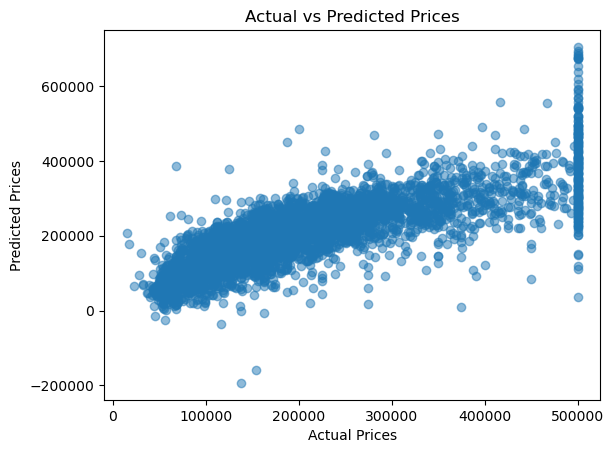

In [13]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# One-hot encode the 'ocean_proximity' categorical feature
# Define a preprocessor to handle the categorical and numerical data separately
categorical_features = ['ocean_proximity']
numerical_features = [col for col in X.columns if col != 'ocean_proximity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessor and split the data
X_processed = preprocessor.fit_transform(X)

# Re-split the data after transformation
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train and evaluate a Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predict and calculate the MSE for Decision Tree
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f'Decision Tree MSE: {tree_mse}')

# Train and evaluate a Random Forest model (optional)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict and calculate the MSE for Random Forest
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MSE: {rf_mse}')


Decision Tree MSE: 4834830243.742733
Random Forest MSE: 2395089638.7275233


Decision Tree MSE: 3671790990.302138
Random Forest MSE: 2387473536.8518043
Decision Tree Cross-Validated MSE: 3824243161.930063
Random Forest Cross-Validated MSE: 2421473441.371028
Gradient Boosting MSE: 3132396022.4572434
Gradient Boosting Cross-Validated MSE: 3029316154.8743544


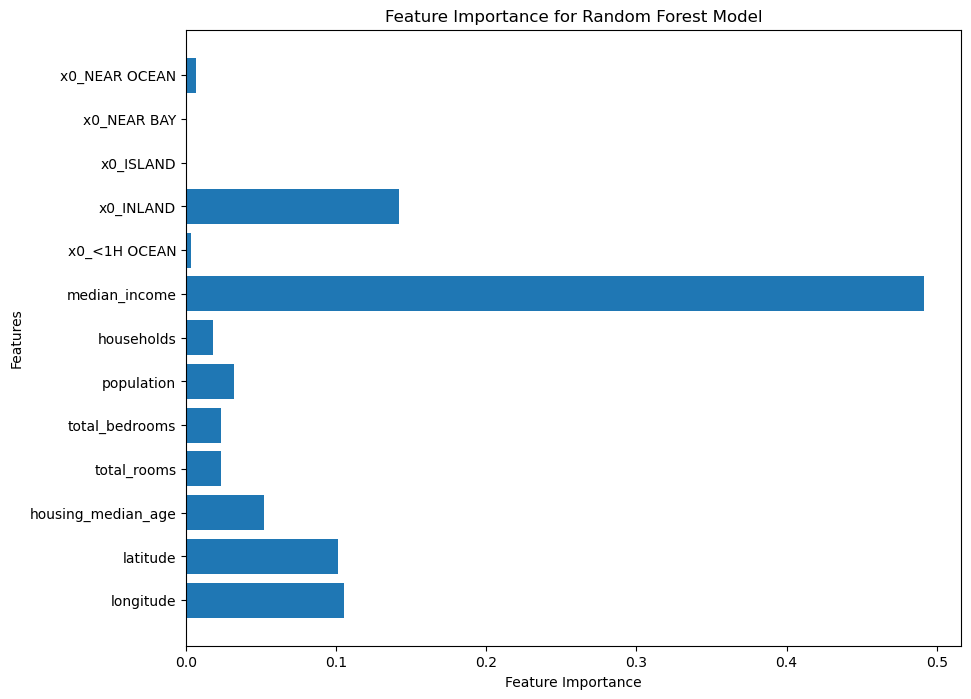

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # For handling missing values
import matplotlib.pyplot as plt


housing = pd.read_csv(r"C:\Users\DELL\Downloads\archive\housing.csv")

# Define the feature matrix X and the target vector y
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Create a column transformer for scaling, encoding, and imputing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with mean
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with mode
            ('encoder', OneHotEncoder())
        ]), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipelines for Decision Tree and Random Forest models
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42))
])

# Fit the Decision Tree model
tree_pipeline.fit(X_train, y_train)
tree_pred = tree_pipeline.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f'Decision Tree MSE: {tree_mse}')

# Fit the Random Forest model
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest MSE: {rf_mse}')

# Perform cross-validation for Decision Tree
tree_cv_scores = cross_val_score(tree_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
tree_cv_mse = -tree_cv_scores.mean()
print(f'Decision Tree Cross-Validated MSE: {tree_cv_mse}')

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_cv_mse = -rf_cv_scores.mean()
print(f'Random Forest Cross-Validated MSE: {rf_cv_mse}')

# Fit a Gradient Boosting model for comparison
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print(f'Gradient Boosting MSE: {gb_mse}')

# Perform cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
gb_cv_mse = -gb_cv_scores.mean()
print(f'Gradient Boosting Cross-Validated MSE: {gb_cv_mse}')

# Plot feature importances for Random Forest
rf_model = rf_pipeline.named_steps['model']  # Extract the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Combine feature names from both numerical and categorical features
encoded_categorical_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out()
all_feature_names = numerical_features + encoded_categorical_features.tolist()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(all_feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest Model")
plt.show()
